<a href="https://colab.research.google.com/github/nasif-raihan/Ml-and-DL-Codes/blob/main/tweet_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis**

The objective is to detect hate speech in tweets.

*Formally, sample of tweets is labelled '1' which denotes the tweet as racist/sexist and labelled '0' which denotes the tweet as not racist/sexist.*

In [ ]:
import os
import re         #for regualr expression
import nltk       #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

#pd.set_option("display.max_colwidth", 200)
#warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#                                                 ****Another way of importing dataset*****



# dir = '/content/drive/MyDrive/Datasets/tweets'

# category = ['train_tweets.csv', 'test_tweets.csv']

# for idx, i in enumerate(category):
#   #print(i, idx)
#   if idx == 0:
#     train = (os.path.join(dir, i))
#     print(train)
#     train = pd.read_csv(train)
    
#   else:
#     test = (os.path.join(dir, i))
#     print(test)
#     test = pd.read_csv(test)

# print(train.shape, test.shape)

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/tweets/train_tweets.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/tweets/test_tweets.csv')

**Data Inspection**

In [ ]:
print(train.shape, test.shape)

(31962, 3) (17197, 2)


In [ ]:
train.head(1)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...


In [ ]:
test.head(1)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...


In [ ]:
train[train['label'] == 0].head(3)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty


In [ ]:
train[train['label'] == 1].head(3)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!


In [ ]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

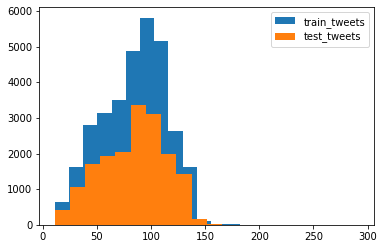

In [ ]:
length_train = train['tweet'].str.len()
#print(length_train)
length_test = test['tweet'].str.len()
#print(length_test)

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label='test_tweets')
plt.legend()
plt.show()

**Data Cleaning**

In [ ]:
train_test_data = train.append(test, ignore_index=True)

print(train_test_data.shape)

(49159, 3)


In [ ]:
train_test_data.head(1)

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...


In [ ]:
# for data in  train_test_data:
#   data['pattern'] = data['tweet'].str.extract('([A-Za-z]+\.', expand = False)

# train_test_data['pattern'].value_counts()

################## kno ekhane alada column add kora gelo na? 

*In re.sub(), specify a regular expression pattern in the first argument, a new string in the second argument, and a string to be processed in the third argument.*

In [ ]:
def remove_pattern(in_txt, pattern):
  r = re.findall(pattern, in_txt)
  #print(r)
  for i in r:
    in_txt = re.sub(i, '', in_txt)

  return in_txt

*Twitter handle hardly gives any information about the nature of the tweets. So we'll remove it.*

In [ ]:
train_test_data['tidy_tweet'] = np.vectorize(remove_pattern)(train_test_data['tweet'], "@[\w]*")

print(train_test_data.head(3))

   id  ...                                         tidy_tweet
0   1  ...    when a father is dysfunctional and is so sel...
1   2  ...    thanks for #lyft credit i can't use cause th...
2   3  ...                                bihday your majesty

[3 rows x 4 columns]


*We'll replce everything except characters and hashtags with spaces*

In [ ]:
train_test_data['tidy_tweet'] = train_test_data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
train_test_data.head(3)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty


*we'll remove short words*

In [ ]:
train_test_data['tidy_tweet'] = train_test_data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

train_test_data.head(3)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty


*We'll tokenize and stem the words to make the next in normalize form.*

In [ ]:
tokenized_tweet = train_test_data['tidy_tweet'].apply(lambda x: x.split())

tokenized_tweet.head(2)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
Name: tidy_tweet, dtype: object

In [ ]:
from nltk.stem.porter import *

stemmer = PorterStemmer()

#print(type(tokenized_tweet))
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])


In [ ]:
tokenized_tweet.head(3)

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
Name: tidy_tweet, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

train_test_data['tidy_tweet'] = tokenized_tweet

train_test_data.head(3)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti


**Visualization**

*Understanding the common words used in the tweets:WordCloud*

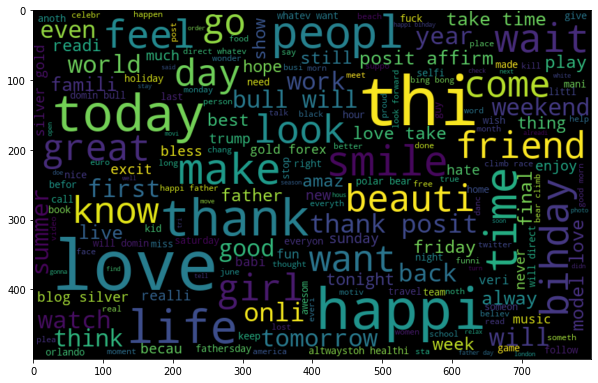

In [ ]:
all_words = ' '.join([text for text in train_test_data['tidy_tweet']])

from wordcloud import WordCloud

wc = WordCloud(width=800, height=500, random_state=21, max_font_size=100).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wc, interpolation='bilinear')
#plt.axis('off')
plt.show()

*Words in non racist tweets*

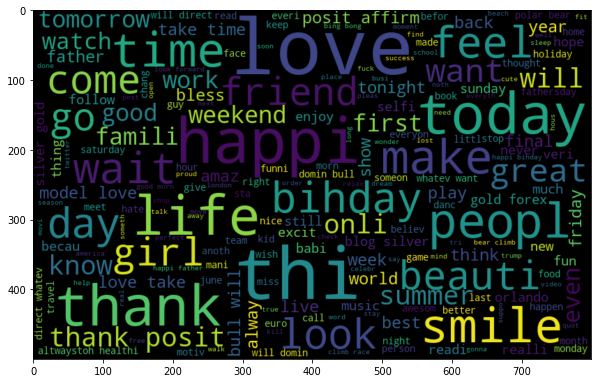

In [ ]:
neutral_words = ' '.join(text for text in train_test_data['tidy_tweet'][train_test_data['label']==0])
neutral_wc = WordCloud(height=500, width=800, min_font_size=5, max_font_size=110, random_state=25).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(neutral_wc, interpolation='bilinear')
#plt.axis('off')
plt.show()

*Words in racist tweets*

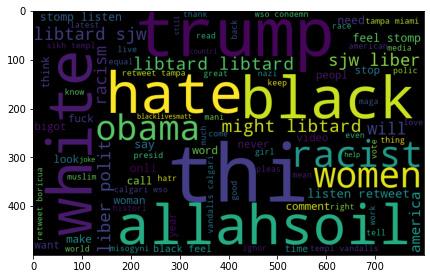

In [ ]:
negative_words = ' '.join(text for text in train_test_data['tidy_tweet'][train_test_data['label']==1])
negative_wc = WordCloud(width=800, height=500, min_font_size=10, random_state=21).generate(negative_words)
plt.figure(figsize=(7, 7))
plt.imshow(negative_wc)
plt.show()

*Undestanding the impact of Hashtags on tweets sentiment*

In [ ]:
def hashtag_extract(x):
  hashtags = []
  for i in x:
    ht = re.findall(r'#\w+', i)
    hashtags.append(ht)
  
  return hashtags

In [ ]:
#fron non racist
ht_neutral = hashtag_extract(train_test_data['tidy_tweet'][train_test_data['label']==0])
#from racist
ht_negative = hashtag_extract(train_test_data['tidy_tweet'][train_test_data['label']==1])

ht_neutral = sum(ht_neutral, [])
ht_negative = sum(ht_negative, [])        #?

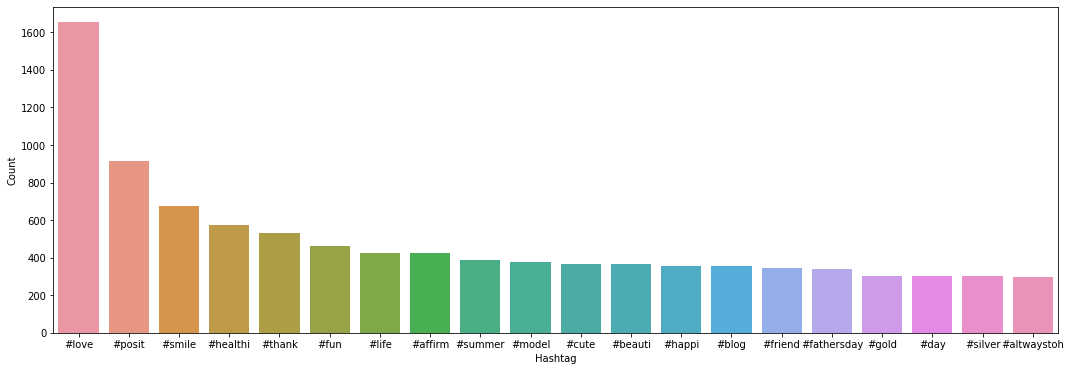

In [ ]:
#Non-racist data

a = nltk.FreqDist(ht_neutral)

d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

d = d.nlargest(columns='Count', n=20)
plt.figure(figsize=(18, 6))
ax = sns.barplot(data=d, x= 'Hashtag', y= 'Count')
ax.set(ylabel = 'Count')
plt.show()

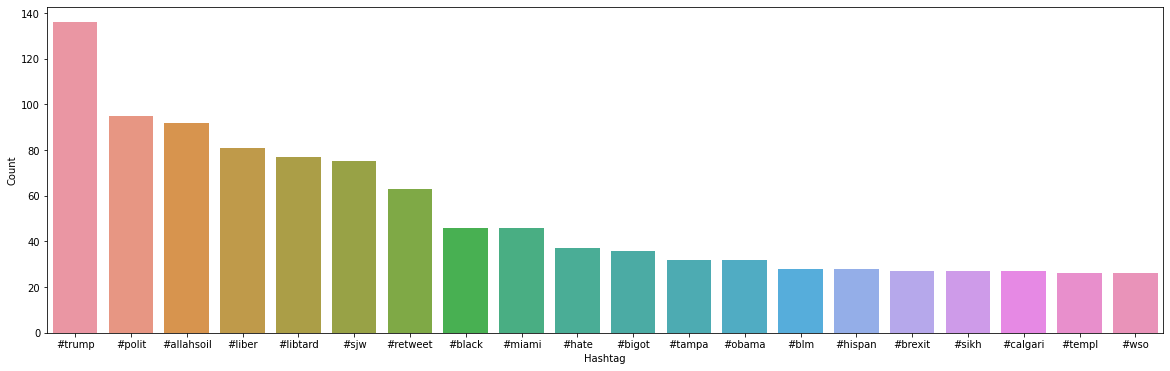

In [ ]:
#Racist data

b = nltk.FreqDist(ht_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
e = e.nlargest(columns='Count', n=20)
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=e, x= 'Hashtag', y= 'Count')

**Text Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
#Bag of Words

#count vectorizer er documentation ??

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train_test_data['tidy_tweet'])
bow.shape

(49159, 1000)

In [ ]:
#TF-IDF Features

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(train_test_data['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [ ]:
#Word2Vec Features
#Word2Vec embeddings
from gensim.models import Word2Vec

tokenized_tweet = train_test_data['tidy_tweet'].apply(lambda x: x.split())

w2v_model = Word2Vec(tokenized_tweet, size= 200, window= 5, min_count= 2, sg= 1, hs= 0, negative= 10, workers= 2, seed= 34)
w2v_model.train(tokenized_tweet, total_examples=len(train_test_data['tidy_tweet']), epochs= 20)


#print(w2v_model.wv.most_similar(positive= 'dinner'))

#print(w2v_model.wv.most_similar(positive= 'trump'))

#print(len(w2v_model['food']), "\n", w2v_model['food'])

(6509720, 7536020)

In [ ]:
#preparing vector for tweets

def word_vector(tokens, size):
  vec = np.zeros(size).reshape(1, size)
  count = 0
  for word in tokens:
    try:
      vec += w2v_model[word].reshape(1, size)
      count += 1
    
    except KeyError:  #handling where token is not in vocabulary
      if count != 0:
        vec /= count
    
    return vec

  #preparing word2vector for feature set

wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
  wordvec_arrays[i, :] = word_vector(tokenized_tweet[i], 200)
  wordvec_df = pd.DataFrame(wordvec_arrays)
  
print(wordvec_df.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(49159, 200)


In [ ]:
#Doc2Vec Embedding


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#BOW Features

train_bow = bow[:31962, :]
test_bow = bow[31962:, :]

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(train_bow, train['label'], random_state= 42, test_size=0.3)

lreg = LogisticRegression()

lreg.fit(X_train_bow, y_train_bow)
prediction = lreg.predict_proba(X_test_bow)           #2 ta value. age konta pore konta?? NO YES
prediction_int = prediction[:, 1] >= 0.3
BOW_prediction_int = prediction_int.astype(np.int)        #np kno holo?
print("F1 Score of the (BOW) model: ", f1_score(y_test_bow, BOW_prediction_int))
#print(prediction, "\n")
#print(prediction_int)

#TF-IDF Features

train_tfidf = tfidf[:31962, :]
test_tfidf = tfidf[31962:, :]

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(train_tfidf, train['label'], random_state= 42, test_size=0.3)

#print(X_train_tfidf)
lreg.fit(X_train_tfidf, y_train_tfidf)
prediction = lreg.predict_proba(X_test_tfidf)
prediction_int = prediction[:, 1] >= 0.3
tfidf_prediction_int = prediction_int.astype(np.int)
print("F1 Score of the (TF-IDF) model: ", f1_score(y_test_tfidf, tfidf_prediction_int))

F1 Score of the (BOW) model:  0.5303408146300915
F1 Score of the (TF-IDF) model:  0.5451327433628319


In [ ]:
#Word2Vec Features

train_w2v = wordvec_df.iloc[:31962]
test_w2v = wordvec_df.iloc[31962:]

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(train_w2v, train['label'], random_state= 42, test_size=.3)

#as y_train_tfidf == y_train_bow
#print(y_train_tfidf == y_train_bow)


# X_train_w2v = train_w2v.iloc[y_train_tfidf.index, :]
# X_test_w2v  = train_w2v.iloc[y_test_bow.index, :]
# y_train_w2v = y_train_tfidf
# y_test_w2v = y_test_bow

print(type(X_train_w2v), type(y_train_w2v))
print(X_train_w2v.isnull().sum())

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
0      36
1      36
2      36
3      36
4      36
       ..
195    36
196    36
197    36
198    36
199    36
Length: 200, dtype: int64


Here we see we got NULL values in 36 rows for each columns. Let's find out and drop it.

In [ ]:
# X_train_w2v.columns
# type(X_train_tfidf)
# ccc = pd.DataFrame(X_train_tfidf.toarray())
# print(type(ccc))

# ccc.isnull().sum().sum()

In [ ]:
# #X_train_w2v.loc[:, X_train_w2v.index.isnull()]

# v = X_train_w2v[X_train_w2v[10].isnull()].index.tolist()
v = X_train_w2v[X_train_w2v[1].isnull()].index.tolist()
# #X_train_w2v.index.isnull()
X_train_w2v.loc[v]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199


In [ ]:
v

[]

In [ ]:
X_train_w2v = X_train_w2v.drop(labels=v, axis=0)
y_train_w2v = y_train_w2v.drop(labels=v, axis=0)
print(X_train_w2v.isnull().sum())
print()
print(y_train_w2v.isnull().sum())

X_train_w2v.shape, y_train_w2v.shape

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Length: 200, dtype: int64

0


((22337, 200), (22337,))

In [ ]:
v_test = X_test_w2v[X_test_w2v[1].isnull()].index.tolist()
v_test
X_test_w2v.isnull().sum()

X_test_w2v = X_test_w2v.drop(labels=v_test, axis=0)
y_test_w2v = y_test_w2v.drop(labels=v_test, axis=0)
print(X_test_w2v.isnull().sum())
print()
print(y_test_w2v.isnull().sum())
X_test_w2v.shape, y_test_w2v.shape

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Length: 200, dtype: int64

0


((9574, 200), (9574,))

In [ ]:
lreg.fit(X_train_w2v, y_train_w2v)
prediction = lreg.predict_proba(X_test_w2v)
prediction_int = prediction[:, 1] >= 0.3
w2v_prediction_int = prediction_int.astype(np.int)
print("F1 Score of the W2V model: ", f1_score(y_test_w2v, w2v_prediction_int))

F1 Score of the W2V model:  0.390104662226451


**Support Vector Machine**

In [ ]:
from sklearn import svm

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability= True).fit(X_train_bow, y_train_bow)
prediction = svc.predict_proba(X_test_bow)
prediction_int = prediction[:, 1] >= 0.3
BOW_prediction_int = prediction_int.astype(np.int)
print('F1 Score of the BOW model: ', f1_score(y_test_bow, BOW_prediction_int))

F1 Score of the BOW model:  0.5097674418604652


In [ ]:
svc = svm.SVC(kernel= 'linear', C= 1, probability= True).fit(X_train_tfidf, y_train_tfidf)
prediction = svc.predict_proba(X_test_tfidf)
prediction_int = prediction[:, 1] >= 0.3
tfidf_prediction_int = prediction_int.astype(np.int)
print("F1 Score of the tfidf model: ", f1_score(y_test_tfidf, prediction_int))

F1 Score of the tfidf model:  0.5105215004574565


In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability= True).fit(X_train_w2v, y_train_w2v)
prediction = svc.predict_proba(X_test_w2v)
prediction_int = prediction[:, 1] >= 0.3
w2v_prediction_int = prediction_int.astype(np.int)
print('F1 Score of the w2v model: ', f1_score(y_test_w2v, w2v_prediction_int))

F1 Score of the w2v model:  0.30035756853396905


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators= 400, random_state= 11)

rf.fit(X_train_bow, y_train_bow)
prediction = rf.predict_proba(X_test_bow)
prediction_int = prediction[:, 1] >= 0.3
BOW_prediction_int = prediction_int.astype(np.int)
print("F1 Score of the BOW model: ", f1_score(y_test_bow, BOW_prediction_int))

F1 Score of the BOW model:  0.508670520231214


In [ ]:
rf.fit(X_train_tfidf, y_train_tfidf)
prediction = rf.predict(X_test_tfidf)
print("F1 Score of the tfidf model: ", f1_score(y_test_tfidf, prediction))

F1 Score of the tfidf model:  0.562152133580705


In [ ]:
rf.fit(X_train_w2v, y_train_w2v)
prediction = rf.predict(X_test_w2v)
print("F1 Score of the W2V model: ", f1_score(y_test_w2v, prediction))

F1 Score of the W2V model:  0.37760702524698136
